In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches

In [3]:
can_data = np.array([101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100, 98.8, 98.1, 98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7, 101.4, 99.4, 101.7, 99, 99.7, 98.8, 99.5, 100, 99.7, 100.9, 99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2, 98.6, 101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1, 101.8, 100, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1, 100.1, 101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9, 101.2, 99.9, 99.1, 100.7, 100.8,100.8, 101.4, 100.3, 98.4, 97.2])

## 도수분포표 생성하기

In [4]:
bins = 5
can_data_binned = pd.cut(can_data, bins=bins)
print(can_data_binned)
    
freq_table = pd.crosstab(index=can_data_binned, columns="frequency")
freq_table['relative_frequency'] = freq_table['frequency'] / freq_table['frequency'].sum()
freq_table['cum_relative_frequency'] = freq_table['relative_frequency'].cumsum()
freq_table.loc['Total'] = freq_table.sum()
freq_table['frequency'] = freq_table['frequency'].astype(int)

freq_table.columns.name = 'can_data'
freq_table.index.name = None

print(freq_table)

[(100.42, 102.06], (100.42, 102.06], (102.06, 103.7], (100.42, 102.06], (100.42, 102.06], ..., (100.42, 102.06], (100.42, 102.06], (98.78, 100.42], (97.14, 98.78], (97.14, 98.78]]
Length: 80
Categories (5, interval[float64, right]): [(95.492, 97.14] < (97.14, 98.78] < (98.78, 100.42] < (100.42, 102.06] < (102.06, 103.7]]
can_data          frequency  relative_frequency  cum_relative_frequency
(95.492, 97.14]           3              0.0375                  0.0375
(97.14, 98.78]           10              0.1250                  0.1625
(98.78, 100.42]          34              0.4250                  0.5875
(100.42, 102.06]         28              0.3500                  0.9375
(102.06, 103.7]           5              0.0625                  1.0000
Total                    80              1.0000                  2.7250


## Pareto 그래프 그리기

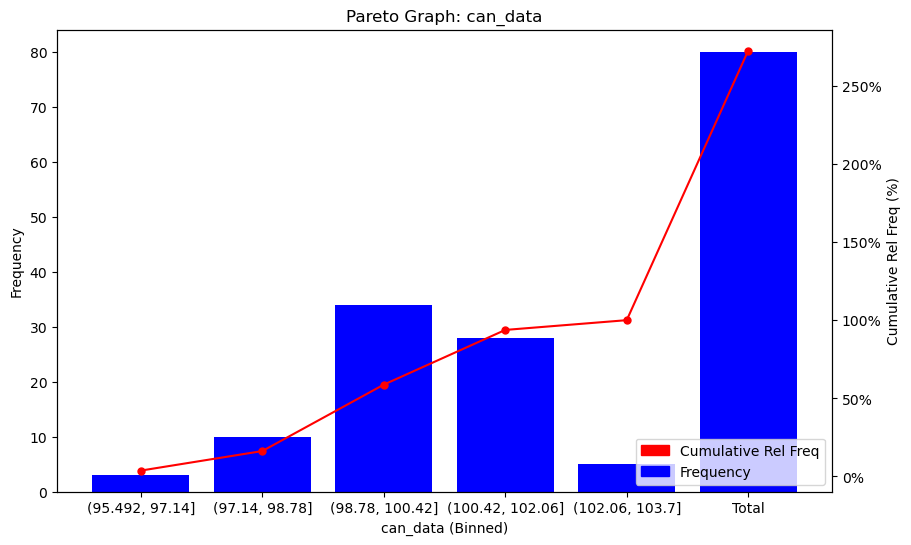

In [5]:
fix, ax = plt.subplots(figsize=(10, 6))
x_label = freq_table.index.astype(str)
ax.bar(x_label, freq_table['frequency'], color='b')
ax2 = ax.twinx()
ax2.plot(x_label, freq_table['cum_relative_frequency'], color='r', marker='o', ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter(1))

p_legend1 = mpatches.Patch(color='r', label='Cumulative Rel Freq')
p_legend2 = mpatches.Patch(color='b', label='Frequency')
plt.legend(handles=[p_legend1, p_legend2], loc="lower right")

# 제목과 축 레이블 설정
plt.title("Pareto Graph: can_data")
ax.set_xlabel("can_data (Binned)")
ax.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Rel Freq (%)")

plt.show()

(array([1., 0., 1., 0., 1., 0., 2., 1., 0., 4., 1., 2., 6., 3., 5., 6., 9.,
        5., 3., 7., 5., 7., 3., 3., 1., 2., 0., 1., 0., 1.]),
 array([ 95.5       ,  95.77333333,  96.04666667,  96.32      ,
         96.59333333,  96.86666667,  97.14      ,  97.41333333,
         97.68666667,  97.96      ,  98.23333333,  98.50666667,
         98.78      ,  99.05333333,  99.32666667,  99.6       ,
         99.87333333, 100.14666667, 100.42      , 100.69333333,
        100.96666667, 101.24      , 101.51333333, 101.78666667,
        102.06      , 102.33333333, 102.60666667, 102.88      ,
        103.15333333, 103.42666667, 103.7       ]),
 <BarContainer object of 30 artists>)

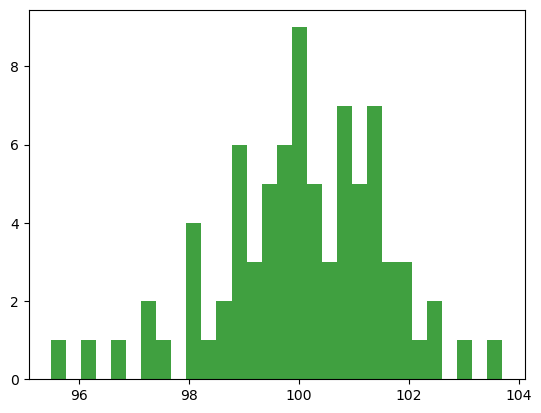

In [6]:
plt.hist(can_data, bins=30, facecolor='g', alpha=0.75)

{'whiskers': [<matplotlib.lines.Line2D at 0x16b5ca090>,
 'caps': [<matplotlib.lines.Line2D at 0x16b5cb910>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b5c9410>],
 'medians': [<matplotlib.lines.Line2D at 0x16b5d8f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b5d9990>],
 'means': []}

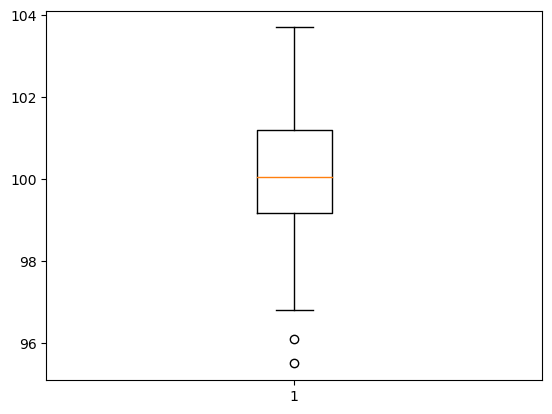

In [7]:
plt.boxplot(can_data)